In [13]:
import numpy as np
from scipy.stats import wishart, dirichlet, multivariate_normal
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def sample_gaussian_mixture_params(
    num_components=5,  # Number of components in the mixture
    dimension=3,       # Dimensionality of the Gaussian
    mean_prior_mean=None,  # Prior mean for the Gaussian means
    mean_prior_cov=None,   # Covariance for the Gaussian means
    wishart_df=None,       # Degrees of freedom for Wishart
    wishart_scale=None,    # Scale matrix for Wishart
    alpha=None             # Concentration parameter for Dirichlet
):
    """
    Samples means, covariances, and mixing weights for a Gaussian mixture model
    using Bayesian priors.
    """
    # Default priors
    if mean_prior_mean is None:
        mean_prior_mean = np.zeros(dimension)  # Zero-centered prior for means
    if mean_prior_cov is None:
        mean_prior_cov = np.eye(dimension)    # Identity matrix as covariance
    if wishart_df is None:
        wishart_df = dimension + 1           # Degrees of freedom >= dimension
    if wishart_scale is None:
        wishart_scale = np.eye(dimension)    # Identity scale matrix
    if alpha is None:
        alpha = np.ones(num_components)      # Uniform Dirichlet prior

    # Sample means from a multivariate normal distribution
    means = np.random.multivariate_normal(mean_prior_mean, mean_prior_cov, num_components)

    # Sample covariances from an inverse-Wishart distribution
    covariances = [np.linalg.inv(wishart.rvs(df=wishart_df, scale=wishart_scale)) for _ in range(num_components)]

    # Sample mixing weights from a Dirichlet distribution
    weights = dirichlet.rvs(alpha, size=1).flatten()

    return means, covariances, weights

def generate_gaussian_mixture_data(num_samples, means, covariances, weights):
    """
    Generates samples from a Gaussian mixture model given its parameters.
    """
    num_components = len(means)
    data = []
    component_labels = []

    # Determine the number of samples for each component based on weights
    samples_per_component = np.random.multinomial(num_samples, weights)

    for i in range(num_components):
        samples = np.random.multivariate_normal(means[i], covariances[i], samples_per_component[i])
        data.append(samples)
        component_labels.extend([i] * samples_per_component[i])

    data = np.vstack(data)
    return data, np.array(component_labels)


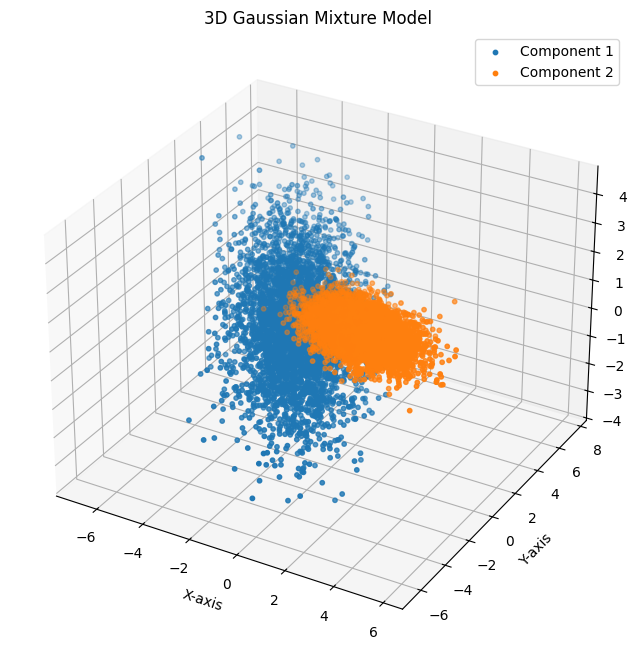

In [22]:
# Parameters
num_components = 2
dimension = 3
num_samples = 10000

# Sample parameters for the Gaussian mixture
sampled_means, sampled_covariances, sampled_weights = sample_gaussian_mixture_params(
    num_components=num_components, dimension=dimension
)

# Generate data from the mixture
data, labels = generate_gaussian_mixture_data(num_samples, sampled_means, sampled_covariances, sampled_weights)

# Visualise the data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(num_components):
    component_data = data[labels == i]
    ax.scatter(component_data[:, 0], component_data[:, 1], component_data[:, 2], label=f'Component {i+1}', s=10)

ax.set_title("3D Gaussian Mixture Model")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")
ax.legend()
plt.show()

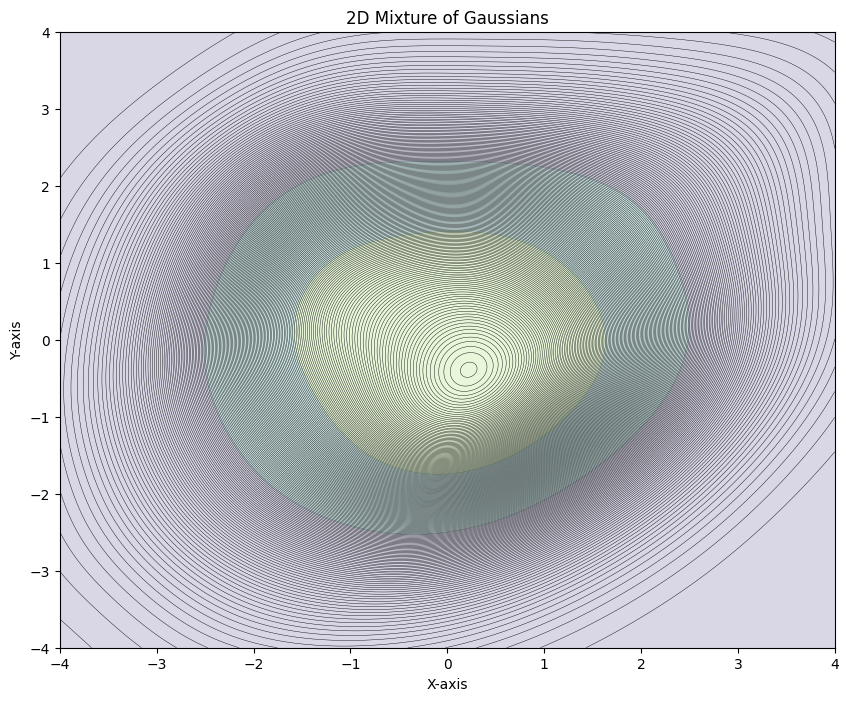

In [65]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

# Function to generate random Gaussian components based on priors
def generate_gaussian_components(num_components):
    components = []
    for _ in range(num_components):
        mean = np.random.uniform(-2, 2, size=2)  # Sample mean from a narrower uniform prior to reduce empty space
        cov_matrix = np.random.rand(2, 2)  # Sample covariance matrix elements from uniform distribution
        cov = np.dot(cov_matrix, cov_matrix.T)  # Make sure covariance matrix is positive semi-definite
        cov += np.eye(2) * 0.5  # Add some variance to ensure stability
        amplitude = np.random.uniform(0.5, 2.0)  # Sample amplitude from a uniform prior
        components.append({"mean": mean, "cov": cov, "amplitude": amplitude})
    return components

# Generate Gaussian components programmatically
num_components = 200  # Set the number of components to 2
gaussians = generate_gaussian_components(num_components)

# Create a grid to evaluate the potential
x, y = np.linspace(-4, 4, 500), np.linspace(-4, 4, 500)  # Adjusted range to fill the entire box
X, Y = np.meshgrid(x, y)
xy = np.column_stack([X.flat, Y.flat])

# Evaluate the mixture of Gaussians at each point in the grid
Z = np.zeros(X.shape)
for gaussian in gaussians:
    rv = multivariate_normal(mean=gaussian["mean"], cov=gaussian["cov"])
    Z += gaussian["amplitude"] * rv.pdf(xy).reshape(X.shape)

# Plotting the landscape with smoother contour lines
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, Z, levels=2, cmap='viridis', alpha=0.2)  # Use contourf for a filled contour plot with smoother appearance
plt.contour(X, Y, Z, levels=2*100, colors='black', linewidths=0.3)  # Add black contour lines for better visualization
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("2D Mixture of Gaussians")
plt.show()

https://www.mlsb.io/papers_2023/Transition_Path_Sampling_with_Boltzmann_Generator-based_MCMC_Moves.pdf